BÀI THỰC HÀNH SỐ 01\
Học phần: Thống kê máy tính và Ứng dụng \
Thời gian làm bài: 60 phút\
Lớp học phần: ...\
Họ và tên: ...\
Mã sinh viên: ...

Cho file dữ liệu airlines_flights_data.csv. Hãy thực hiện các yêu cầu sau:
1. Đọc dữ liệu và hiển thị 5 dòng đầu tiên, 10 dòng cuối cùng (1đ).
2. Hiển thị các thuộc tính định tính, các thuộc tính định lượng (1đ).
3. Kiểm tra xem dữ liệu có bị thiếu, bị trùng lặp không, xử lý bằng cách xoá bỏ (nếu có) và kiểm tra kết quả sau khi thực hiện (2đ).
4. Tính các đặc trưng của các thuộc tính định lượng (1đ).
5. Vẽ Boxplot về giá vé (Price) và chỉ ra các giá trị ngoại lệ (nếu có) (1đ).
6. Có bao nhiêu đường bay (source_city đến destination_city)? Tính giá vé trung bình của mỗi đường bay (1đ).
7. Đường bay nào có giá trung bình thấp nhất? giá trung bình bao nhiêu? (1đ).
8. Vẽ đồ thị trực quan giá vé thấp nhất của các đường bay khi mua vào thời điểm cách ngày bay (days_left) 3 ngày (1đ).
9. Tìm đường bay và chuyến bay vào buổi sáng có giá thấp nhất khi mua vé vào thời điểm cách ngày bay 3 ngày? (1đ).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [2]:
df = pd.read_csv('airlines_flights_data.csv')
df.head(5)

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,NaN,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [3]:
df.tail(10)

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
300143,300143,Air_India,AI-440,Chennai,Early_Morning,one,Night,Hyderabad,Business,17.42,49,51345
300144,300144,Air_India,AI-539,Chennai,Evening,one,Morning,Hyderabad,Business,18.92,49,51345
300145,300145,Air_India,AI-430,Chennai,Morning,one,Morning,Hyderabad,Business,23.08,49,51345
300146,300146,Air_India,AI-440,Chennai,Early_Morning,one,Morning,Hyderabad,Business,26.83,49,51345
300147,300147,Air_India,AI-569,Chennai,Early_Morning,one,Night,Hyderabad,Business,17.25,49,68739
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585
300152,300152,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,81585


In [4]:
df.dtypes

index                 int64
airline              object
flight               object
source_city          object
departure_time       object
stops                object
arrival_time         object
destination_city     object
class                object
duration            float64
days_left             int64
price                 int64
dtype: object

In [5]:
print(df.isna().sum())
print('===')
print(df.duplicated().sum())

df = df.drop_duplicates()
df = df.dropna()

index               0
airline             0
flight              1
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64
===
0


In [6]:
df[['duration','days_left','price']].describe()

,duration,days_left,price
count,300152.000000,300152.000000,300152.000000
mean,12.221054,26.004834,20889.710280
std,7.191986,13.560949,22697.788807
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


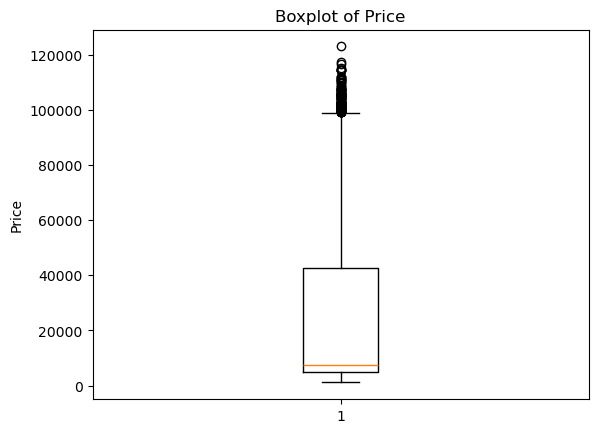


Các giá trị ngoại lệ của Price:
         price
215858  114434
215859  116562
216025  100395
216094   99129
216095  101369
...        ...
293474  107597
296001  102832
296081  102384
296170  104624
296404  102384

[123 rows x 1 columns]


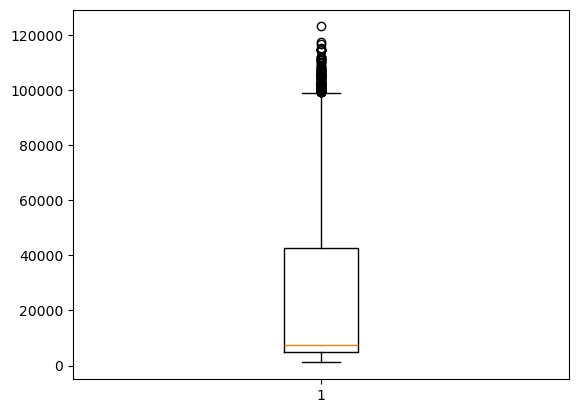

In [7]:
#Vẽ Boxplot về giá vé (Price) và chỉ ra các giá trị ngoại lệ (nếu có)

gia = df['price']# Bước 6: Vẽ boxplot giá vé (Price)
plt.boxplot(df['price'])
plt.title("Boxplot of Price")
plt.ylabel("Price")
plt.show()

# Để in giá trị ngoại lệ
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['price'] < Q1 - 1.5*IQR) | (df['price'] > Q3 + 1.5*IQR)]
print("\nCác giá trị ngoại lệ của Price:")
print(outliers[['price']])

plt.boxplot(gia)
plt.show()

In [8]:
#Có bao nhiêu đường bay (source_city đến destination_city)? Tính giá vé trung bình của mỗi đường bay

# Bước 7: Số lượng đường bay và giá vé trung bình mỗi đường bay
route_avg = df.groupby(['source_city','destination_city'])['price'].mean().reset_index()
print("\nSố đường bay:", route_avg.shape[0])
print("Giá vé trung bình mỗi đường bay:")
print(route_avg)



Số đường bay: 30
Giá vé trung bình mỗi đường bay:
   source_city destination_city         price
0    Bangalore          Chennai  23321.850078
1    Bangalore            Delhi  17723.313972
2    Bangalore        Hyderabad  21226.121192
3    Bangalore          Kolkata  23500.061229
4    Bangalore           Mumbai  23128.618672
5      Chennai        Bangalore  25081.850454
6      Chennai            Delhi  18981.863948
7      Chennai        Hyderabad  21591.345404
8      Chennai          Kolkata  22669.932407
9      Chennai           Mumbai  22765.849647
10       Delhi        Bangalore  17880.216315
11       Delhi          Chennai  19369.881354
12       Delhi        Hyderabad  17347.288379
13       Delhi          Kolkata  20566.409418
14       Delhi           Mumbai  19356.706371
15   Hyderabad        Bangalore  21347.177998
16   Hyderabad          Chennai  21848.065989
17   Hyderabad            Delhi  17243.945685
18   Hyderabad          Kolkata  20823.893201
19   Hyderabad           Mumb

In [9]:
# Bước 8: Đường bay có giá trung bình thấp nhất
min_price_route = route_avg.loc[route_avg['price'].idxmin()]
print("\nĐường bay có giá trung bình thấp nhất:")
print(min_price_route)



Đường bay có giá trung bình thấp nhất:
source_city            Hyderabad
destination_city           Delhi
price               17243.945685
Name: 17, dtype: object


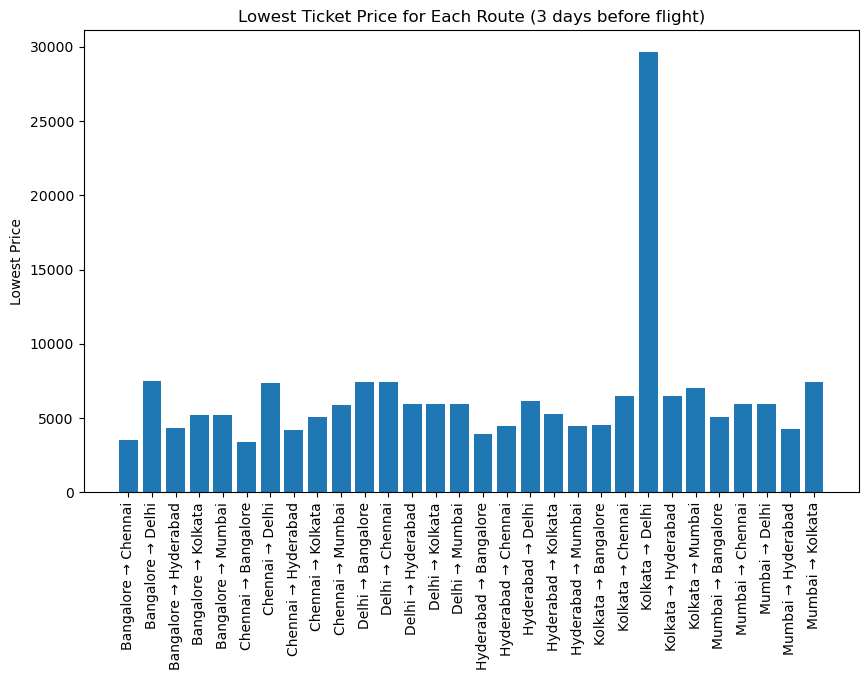

In [10]:
# Bước 9: Vẽ đồ thị giá vé thấp nhất khi days_left = 3
df_days3 = df[df['days_left']==3]
min_price_days3 = df_days3.groupby(['source_city','destination_city'])['price'].min().reset_index()

plt.figure(figsize=(10,6))
plt.bar(
    x=min_price_days3['source_city'] + " → " + min_price_days3['destination_city'],
    height=min_price_days3['price']
)
plt.xticks(rotation=90)
plt.ylabel("Lowest Price")
plt.title("Lowest Ticket Price for Each Route (3 days before flight)")
plt.show()


In [12]:
min_price_days3

,source_city,destination_city,price
0,Bangalore,Chennai,3497
1,Bangalore,Delhi,7484
2,Bangalore,Hyderabad,4337
3,Bangalore,Kolkata,5176
4,Bangalore,Mumbai,5174
5,Chennai,Bangalore,3361
6,Chennai,Delhi,7352
7,Chennai,Hyderabad,4202
8,Chennai,Kolkata,5040
9,Chennai,Mumbai,5880
